In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Ríos

In [13]:
#Series
df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].fillna(0)
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')
df_merge_riosCanales = df_merge_riosCanales[df_merge_riosCanales['date'].dt.year >= 1960]
## identificadores de ríos
df_rios_canales_id = pd.read_csv('BBDD/Cuenca hidrográfica Juca SI/F2796_Rios_y_Canales_ROEA/F2796_M0_Todas.csv', encoding='UTF-8',index_col = 0)
df_rios_canales_id = df_rios_canales_id.rename(columns = {'Cód. Estación' : 'id_station','Cantidad (hm³)' : 'quantity_hm3'})

In [21]:
df_rios_canales_id['Sistema de Explotación'].unique()

array(['Júcar', 'Serpis', 'Marina Baja', 'Vinalopó-Alacantí',
       'Mijares-Plana de Castellón', 'Palancia-Los Valles',
       'Cenia-Maestrazgo', 'Turia', nan], dtype=object)

## Jucar

Sacamos las estaciones de aforo de nuestra base de datos que corresponden al Río Jucar

In [404]:
df_rios_canales_id

,id_station,Estación de Aforo,Cód. ROEA,Tipo,Cód. Munic.,Municipio,Cód. SE,Sistema de Explotación,UTM ETRS89 X,UTM ETRS89 Y,Altitud (m),longitude,latitude
0,8036,LOS FRAILES,8036,RIO,2003,Albacete,5.0,Júcar,608082.155096,4.332792e+06,"607,0",-1.749414,39.137609
1,8144,ALCALA DEL JUCAR,8144,RIO,2007,Alcalá del Júcar,5.0,Júcar,635980.144154,4.339792e+06,"274,0",-1.425311,39.196752
2,8138,BALAZOTE,8138,RIO,2012,Balazote,5.0,Júcar,576387.821640,4.306296e+06,"0,0",-2.119058,38.902234
3,8097,MONTEMAYOR,8097,RIO,2022,Casas de Lázaro,5.0,Júcar,567424.619152,4.286560e+06,"1020,0",-2.224348,38.725132
4,8131,ACQ. VADO DE HERRERA,8410,CANAL,2022,Casas de Lázaro,5.0,Júcar,567436.619221,4.286561e+06,"0,0",-2.224210,38.725141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,8026,ROBELLA,8026,RIO,46250,València,4.0,Turia,723765.399070,4.372416e+06,"17,0",-0.398649,39.472258
137,8071,VILLALONGA,8071,RIO,46255,Vilallonga/Villalonga,6.0,Serpis,735681.101601,4.305931e+06,"184,0",-0.283408,38.870651
138,8023,VILLAMARCHANTE,8023,RIO,46256,Vilamarxant,4.0,Turia,706380.578723,4.382011e+06,"92,0",-0.597605,39.562983
139,8224,ACQ. DE LORCA,8429,CANAL,46256,Vilamarxant,4.0,Turia,704495.623689,4.383951e+06,NaN,-0.618931,39.580900


In [43]:
id_estaciones_jucar = df_rios_canales_id[df_rios_canales_id['Sistema de Explotación'] == 'Júcar']['id_station'].to_list()
df_rios_canales_id[df_rios_canales_id['Sistema de Explotación'] == 'Júcar']

,id_station,Estación de Aforo,Cód. ROEA,Tipo,Cód. Munic.,Municipio,Cód. SE,Sistema de Explotación,UTM ETRS89 X,UTM ETRS89 Y,Altitud (m),longitude,latitude
0,8036,LOS FRAILES,8036,RIO,2003,Albacete,5.0,Júcar,608082.155096,4.332792e+06,"607,0",-1.749414,39.137609
1,8144,ALCALA DEL JUCAR,8144,RIO,2007,Alcalá del Júcar,5.0,Júcar,635980.144154,4.339792e+06,"274,0",-1.425311,39.196752
2,8138,BALAZOTE,8138,RIO,2012,Balazote,5.0,Júcar,576387.821640,4.306296e+06,"0,0",-2.119058,38.902234
3,8097,MONTEMAYOR,8097,RIO,2022,Casas de Lázaro,5.0,Júcar,567424.619152,4.286560e+06,"1020,0",-2.224348,38.725132
4,8131,ACQ. VADO DE HERRERA,8410,CANAL,2022,Casas de Lázaro,5.0,Júcar,567436.619221,4.286561e+06,"0,0",-2.224210,38.725141
5,8137,TIRIEZ,8137,RIO,2043,Lezuza,5.0,Júcar,564727.759598,4.305508e+06,"0,0",-2.253590,38.896071
6,8085,MAHORA,8085,RIO,2046,Mahora,5.0,Júcar,608805.206470,4.338207e+06,"645,0",-1.740179,39.186302
7,8132,EL PUENTE DEL CARRASCO,8132,RIO,2069,"Roda, La",5.0,Júcar,584612.081317,4.340871e+06,NaN,-2.019927,39.212996
8,8133,LA TEJA,8402,CANAL,2073,Tarazona de la Mancha,5.0,Júcar,584656.081306,4.340857e+06,NaN,-2.019419,39.212866
9,8053,VILLATOYA,8053,RIO,2082,Villatoya,5.0,Júcar,642890.218732,4.355792e+06,NaN,-1.341927,39.339757


Cada estación tiene una serie temporal y como hay varias estaciones en el Jucar, agrupamos todas las estaciones por fecha elaborando el promedio de las mismas. De esta forma, cada fecha registrará el promedio de agua que hay en todas las estaciones de aforo del Río Jucar

In [55]:
seriesJucar = df_merge_riosCanales[df_merge_riosCanales['id_station'].isin(id_estaciones)][['date','quantity_hm3_riosCanales']].groupby('date').mean()

### Tendencia

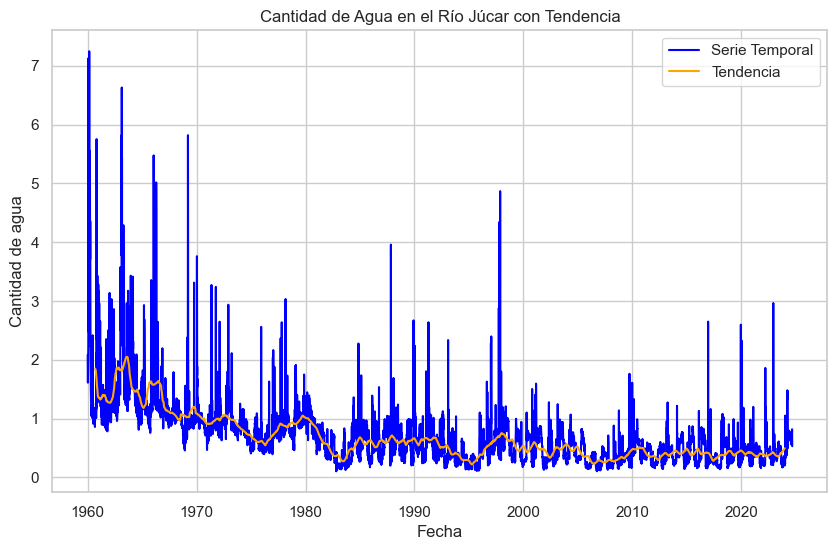

In [67]:
# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(seriesJucar['quantity_hm3_riosCanales'], model='additive', period=500)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=seriesJucar.index, y=seriesJucar['quantity_hm3_riosCanales'], label='Serie Temporal', color='blue')
sns.lineplot(x=seriesJucar.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en el Río Júcar con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

Si aislamos la tendencia

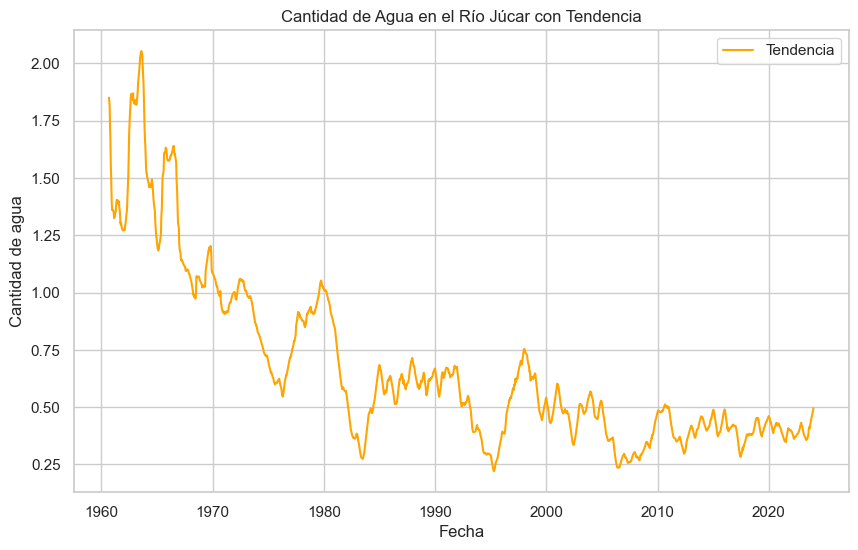

In [76]:
decomposition = seasonal_decompose(seriesJucar['quantity_hm3_riosCanales'], model='additive', period=500)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en el Río Júcar con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

### Máximos y mínimos 

Ahora vamos a ver  la tendencia de los mínimos y los máximos de la serie temporal.
La idea es que por cada 30 días (cada mes), se saque el máximo o el mínimo para ver cómo cambia el máximos o mínimo mensual a lo largo de la serie de tiempo. 

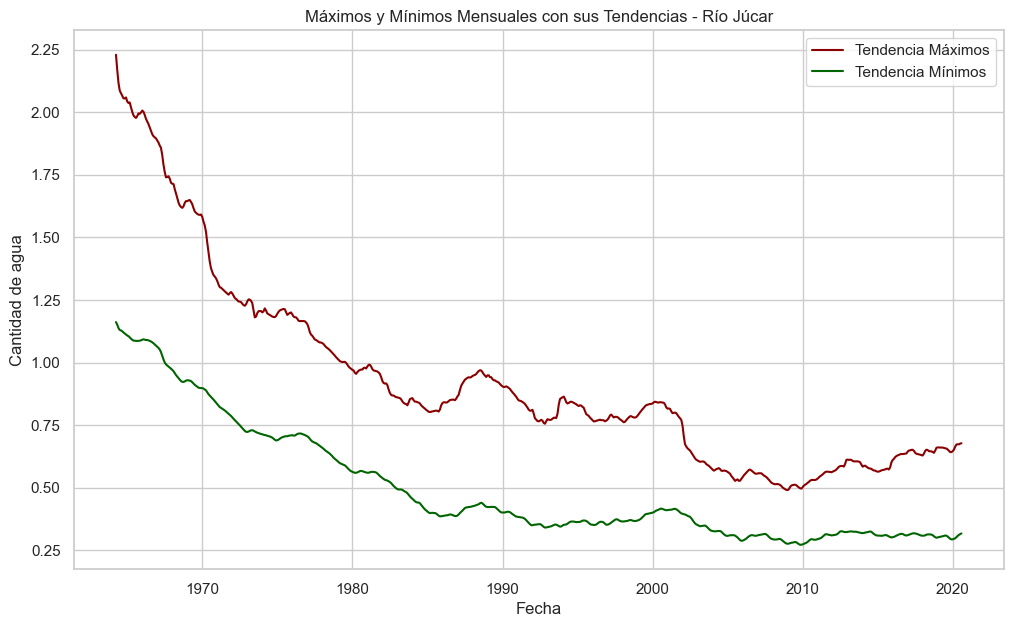

In [80]:

# Encontrar máximos y mínimos de la serie temporal mensual
maximos = seriesJucar['quantity_hm3_riosCanales'].resample('M').max()
minimos = seriesJucar['quantity_hm3_riosCanales'].resample('M').min()

# Extraer tendencias usando descomposición de serie temporal
tendencia_maximos = sm.tsa.seasonal_decompose(maximos, model='additive', period=100).trend
tendencia_minimos = sm.tsa.seasonal_decompose(minimos, model='additive', period=100).trend

# Graficar máximos, mínimos y sus tendencias
plt.figure(figsize=(12, 7))

# Graficar máximos y su tendencia
sns.lineplot(x=tendencia_maximos.index, y=tendencia_maximos, label='Tendencia Máximos', color='darkred')

# Graficar mínimos y su tendencia
sns.lineplot(x=tendencia_minimos.index, y=tendencia_minimos, label='Tendencia Mínimos', color='darkgreen')


# Configuraciones del gráfico
plt.title('Máximos y Mínimos Mensuales con sus Tendencias - Río Júcar')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


Vemos que tanto la máxima cantidad como la mínima cantidad de agua mensual tiene una tendencia decreciente a lo largo del tiempo

### Varianza

Ahora vamos a ver cómo cambia la varianza de la serie temporal cada 30 días, es decir, en lugar de calcular la varianza para todos los días de golpe, utilizamos "ventanas" de tiempo. Esto significa que miramos solo un grupo de días a la vez y le calculamos la varianza. De esta forma, vemos cómo la serie temporal cambia cada 30 días

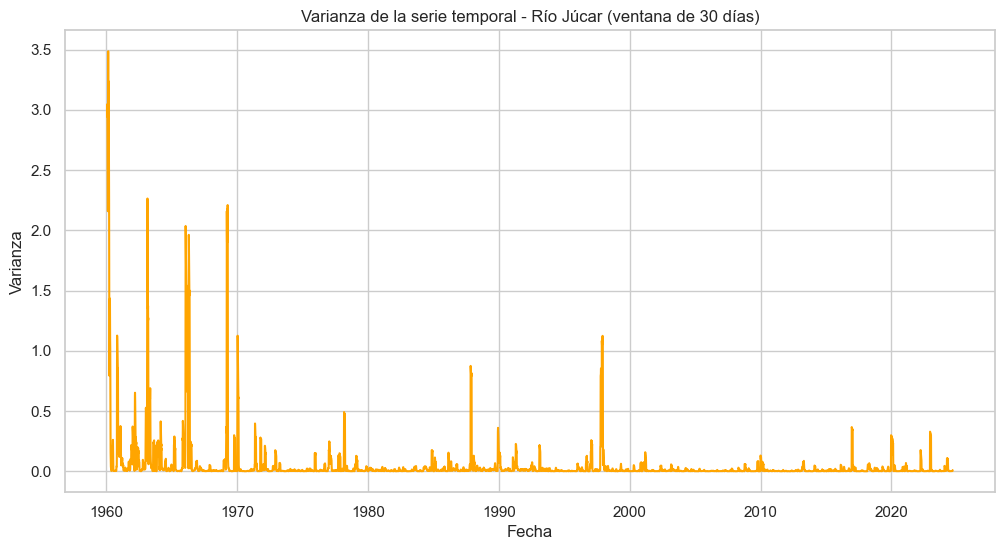

In [82]:
# Calcular la varianza en ventanas de 30 días
varianza_30_dias = seriesJucar['quantity_hm3_riosCanales'].rolling(window=30).var()

# Graficar la varianza
plt.figure(figsize=(12, 6))
sns.lineplot(x=varianza_30_dias.index, y=varianza_30_dias, color='orange')
plt.title('Varianza de la serie temporal - Río Júcar (ventana de 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Varianza')
plt.show()

Vemos que antes no sólo en promedio había mayor cantidad de agua sino que ademáshabía mayor variación

### Autocorrelaciones

In [83]:
from statsmodels.graphics.tsaplots import plot_acf

#### Autocorrelación diaria

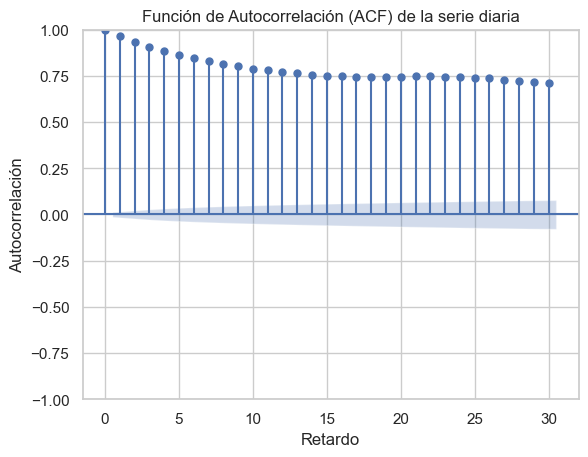

In [108]:
# Supongamos que ya tienes la serie temporal 'seriesJucar' y la columna 'quantity_hm3_riosCanales'
# Graficar la ACF
plot_acf(seriesJucar['quantity_hm3_riosCanales'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie diaria')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

Al analizar la **autocorrelación** de la serie temporal a nivel diario, se observa que los valores son consistentemente similares a través de los diferentes retardos. Esto indica que la serie muestra una fuerte dependencia temporal, donde los valores de días previos tienen una influencia notable sobre los valores actuales.

##### Observaciones Clave

1. **Campana Horizontal Pequeña**: 
   - La banda de confianza es pequeña, lo que sugiere que los valores de autocorrelación son estadísticamente significativos en la mayoría de los retardos. Esto implica que la serie no presenta un comportamiento aleatorio, sino que sigue un patrón que puede ser modelado.

2. **Autocorrelación Inicial**: 
   - Es evidente que los primeros días tienen una autocorrelación más alta en comparación con los días más lejanos. Esto es común en series temporales, donde los valores más recientes suelen tener una mayor relación con los valores actuales.

3. **Alta Autocorrelación en Días Previos**: 
   - A pesar de la disminución gradual en la autocorrelación a medida que aumentan los retardos, se observa que incluso los retardos más lejanos mantienen un nivel de autocorrelación significativo. Esto sugiere que la serie temporal tiene memoria y que los eventos pasados continúan influyendo en el comportamiento presente.

##### Conclusión

En resumen, la fuerte autocorrelación observada en la serie temporal diaria resalta la importancia de considerar tanto los datos recientes como los más antiguos al modelar y predecir futuras cantidades de agua. Esto también sugiere que los modelos que capturan estas dependencias temporales, como los modelos ARIMA, podrían ser efectivos para pronosticar la dinámica del sistema hidrológico.

#### Autocorrealación mensual

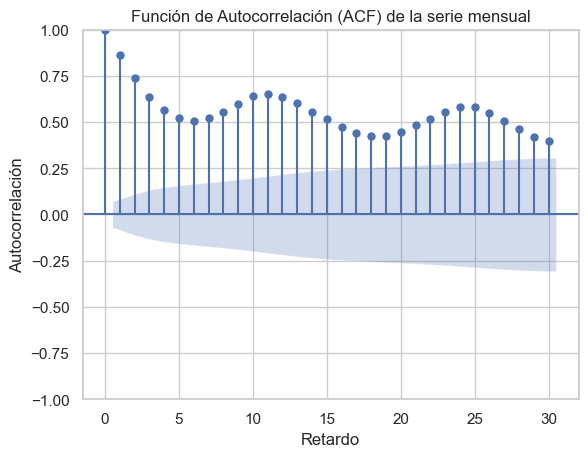

In [109]:
monthly_series = seriesJucar.resample('M').mean()
monthly_series.reset_index(inplace=True)
plot_acf(monthly_series['quantity_hm3_riosCanales'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie mensual')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

Al analizar la **autocorrelación** de la serie temporal a nivel mensual, se observa que la campana de autocorrelación es ligeramente más amplia que en el análisis diario. Esto indica que, aunque la influencia de los valores pasados sigue siendo significativa, la relación se vuelve más cíclica y compleja.

##### Observaciones Clave

1. **Campana de Autocorrelación**:
   - Aunque la amplitud de la campana es mayor en comparación con el análisis diario, sigue siendo relativamente pequeña. Esto sugiere que todos los valores de autocorrelación son significativos, destacando una clara dependencia temporal en la serie.

2. **Ciclicidad en la Autocorrelación**:
   - Es interesante notar que, a partir del quinto retardo mensual, la autocorrelación comienza a mostrar un comportamiento cíclico. Este patrón sugiere que hay efectos estacionales o ciclos anuales en los datos. En particular, el mes 11 presenta un máximo en la autocorrelación, lo que podría indicar un incremento en las cantidades de agua que se relacionan con factores estacionales o eventos climáticos.

3. **Descensos y Ascensos de la Autocorrelación**:
   - Tras el pico en el mes 11, la autocorrelación comienza a decaer, alcanzando un mínimo en el mes 18. Sin embargo, posteriormente, se observa un ascenso de la autocorrelación hasta el mes 25, antes de volver a decaer. Este comportamiento cíclico es indicativo de que el sistema hidrológico puede verse influenciado por factores recurrentes, como variaciones climáticas estacionales, que afectan la disponibilidad de agua en la cuenca.

4. **Significatividad de los Valores**:
   - Todos los valores de autocorrelación se encuentran fuera de la banda de confianza, lo que confirma que son estadísticamente significativos. Esto refuerza la idea de que la serie temporal tiene un comportamiento estructurado, en lugar de ser aleatoria.

##### Conclusión

En conclusión, el análisis de la autocorrelación mensual revela patrones cíclicos significativos que pueden ser cruciales para entender la dinámica del sistema hidrológico en la cuenca. La influencia de los meses anteriores, especialmente en los puntos altos y bajos de autocorrelación, indica que es fundamental tener en cuenta las variaciones estacionales al modelar y predecir las cantidades de agua en la cuenca del Júcar.

#### Autocorrelación anual

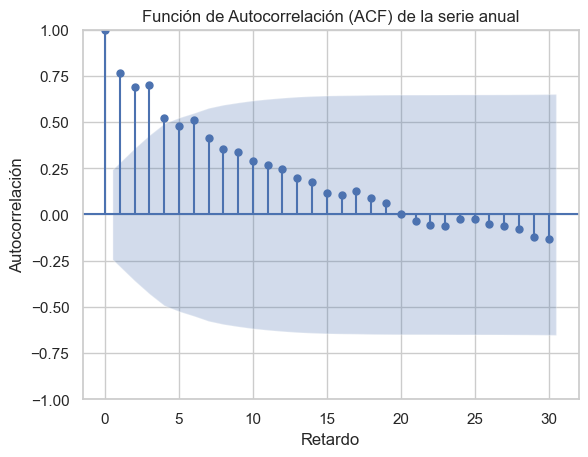

In [110]:
monthly_series = seriesJucar.resample('Y').mean()
monthly_series.reset_index(inplace=True)
plot_acf(monthly_series['quantity_hm3_riosCanales'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie anual')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

Al analizar la **autocorrelación** en la serie temporal a nivel anual, se observa un patrón decreciente. Este comportamiento indica que el efecto de los valores pasados sobre el año actual tiende a disminuir con el tiempo. 

##### Observaciones Clave

1. **Comportamiento Decreciente**:
   - La autocorrelación anual muestra una tendencia a la baja a medida que aumenta el número de años de retardo. Esto sugiere que, aunque los datos del pasado influyen en el presente, su impacto disminuye significativamente con cada año que pasa. Este fenómeno podría estar relacionado con la naturaleza cambiante de los factores climáticos y hidrológicos que afectan la cuenca.

2. **Significatividad de los Retardos**:
   - La campana de autocorrelación se sitúa por encima de la banda de confianza solo hasta el cuarto año. Esto implica que los eventos ocurridos en los cuatro años anteriores tienen un efecto notable en las cantidades de agua del año actual. Este hallazgo subraya la importancia de considerar un período de tiempo más largo al analizar la disponibilidad de agua, ya que los efectos acumulativos de años anteriores pueden ser significativos.

3. **Implicaciones para el Modelado**:
   - La relación identificada sugiere que los modelos predictivos de la cantidad de agua en la cuenca del Júcar deben incluir no solo los datos del año actual, sino también los de hasta cuatro años previos. Esto es esencial para capturar adecuadamente las dinámicas del sistema hidrológico y realizar pronósticos más precisos.

##### Conclusión

En resumen, el análisis de la autocorrelación anual revela que las condiciones del año actual están influenciadas por los eventos de hasta cuatro años previos. Esta información es crucial para comprender las dinámicas de la cuenca del Júcar y para la elaboración de modelos que consideren las variaciones a largo plazo en la disponibilidad de agua.

## Turia

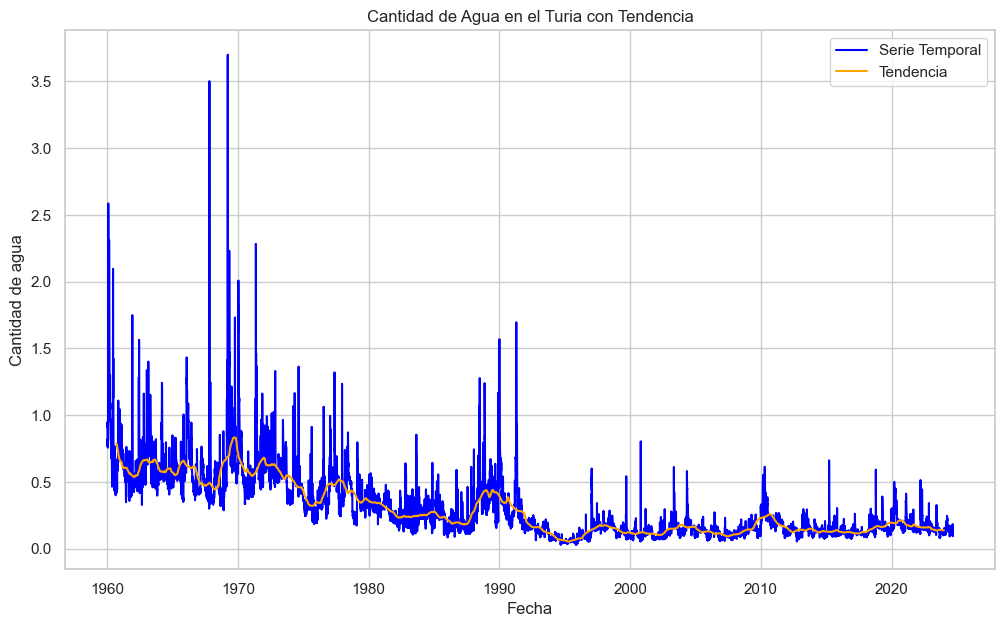

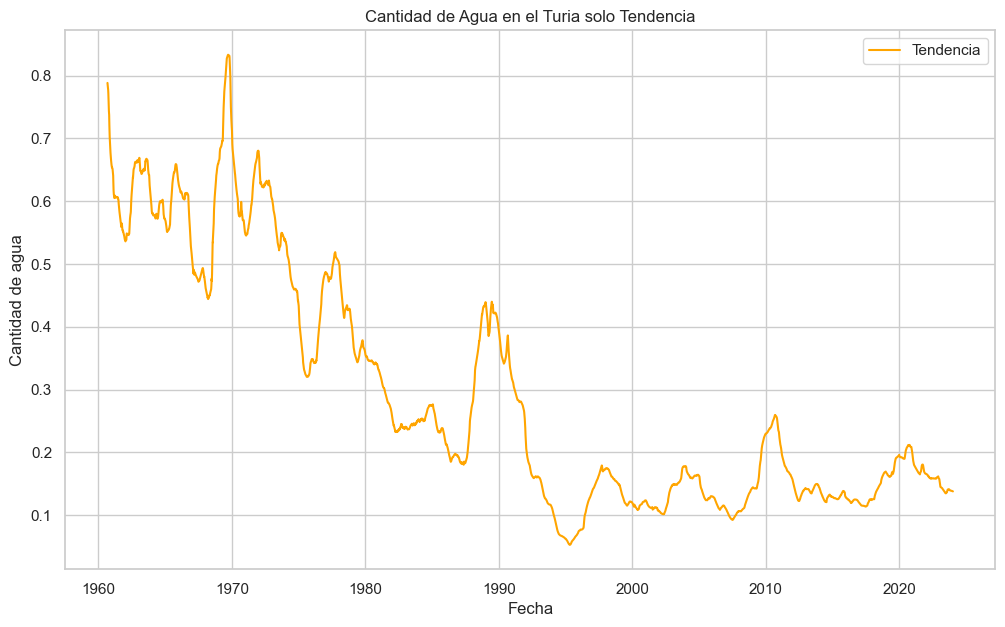

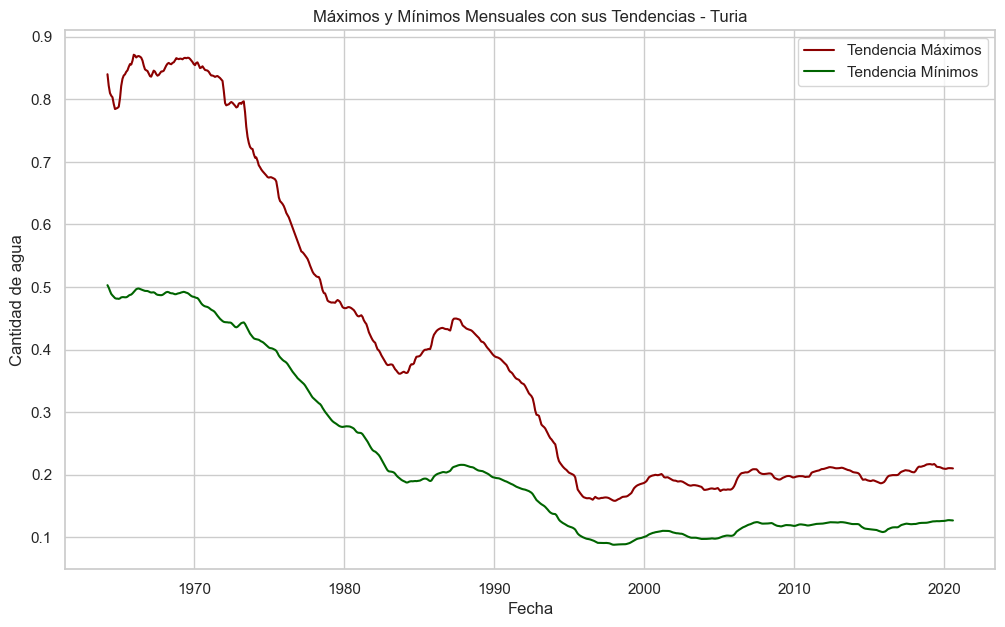

In [288]:
id_estaciones_Turia = df_rios_canales_id[df_rios_canales_id['Sistema de Explotación'] == 'Turia']['id_station'].to_list()
seriesTuria = df_merge_riosCanales[df_merge_riosCanales['id_station'].isin(id_estaciones_Turia)][['date','quantity_hm3_riosCanales']].groupby('date').mean()

# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(seriesTuria['quantity_hm3_riosCanales'], model='additive', period=500)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=seriesTuria.index, y=seriesTuria['quantity_hm3_riosCanales'], label='Serie Temporal', color='blue')
sns.lineplot(x=seriesTuria.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en el Turia con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en el Turia solo Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

# Encontrar máximos y mínimos de la serie temporal mensual
maximos = seriesTuria['quantity_hm3_riosCanales'].resample('M').max()
minimos = seriesTuria['quantity_hm3_riosCanales'].resample('M').min()

# Extraer tendencias usando descomposición de serie temporal
tendencia_maximos = sm.tsa.seasonal_decompose(maximos, model='additive', period=100).trend
tendencia_minimos = sm.tsa.seasonal_decompose(minimos, model='additive', period=100).trend

# Graficar máximos, mínimos y sus tendencias
plt.figure(figsize=(12, 7))

# Graficar máximos y su tendencia
sns.lineplot(x=tendencia_maximos.index, y=tendencia_maximos, label='Tendencia Máximos', color='darkred')

# Graficar mínimos y su tendencia
sns.lineplot(x=tendencia_minimos.index, y=tendencia_minimos, label='Tendencia Mínimos', color='darkgreen')


# Configuraciones del gráfico
plt.title('Máximos y Mínimos Mensuales con sus Tendencias - Turia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


#### Autocorrelación

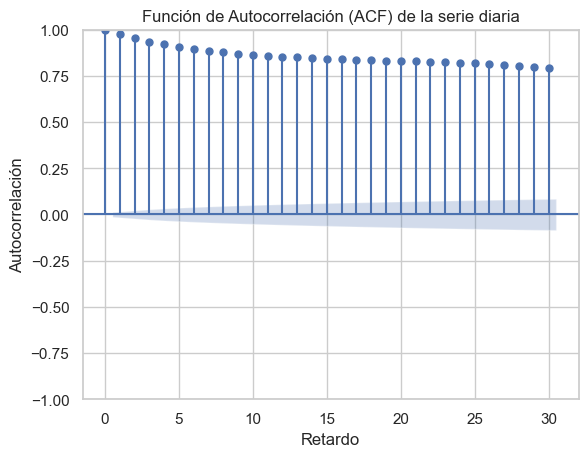

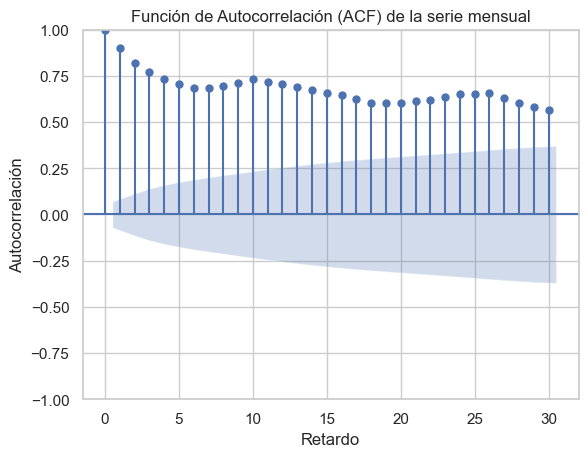

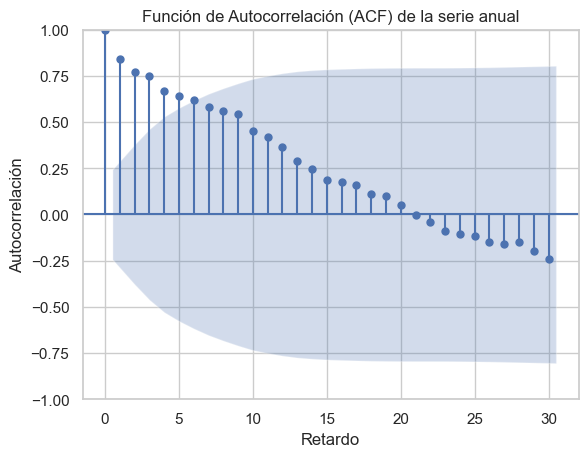

In [290]:
plot_acf(seriesTuria['quantity_hm3_riosCanales'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie diaria')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

monthly_series = seriesTuria.resample('M').mean()
monthly_series.reset_index(inplace=True)
plot_acf(monthly_series['quantity_hm3_riosCanales'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie mensual')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

year_series = seriesTuria.resample('Y').mean()
year_series.reset_index(inplace=True)
plot_acf(year_series['quantity_hm3_riosCanales'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie anual')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

# Embalses

In [315]:
# df embalses
df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_embalses['date'] = pd.to_datetime(df_merge_embalses['date'])
df_merge_embalses = df_merge_embalses[df_merge_embalses['date'].dt.year >= 1960]
df_embalses_id = pd.read_csv('BBDD/CEDEX - CH Jucar/Transformados/df_embalses_cedex_id.csv', index_col = 0)
df_embalses_id = df_embalses_id.rename(columns = {'ref_ceh' : 'id_station'})

Embalses más representativos

In [319]:
promedios_estaciones = df_merge_embalses[['id_station', 'quantity_hm3_embalses']].groupby('id_station').mean().sort_values('quantity_hm3_embalses',ascending = False).head(5).reset_index()
estaciones = promedios_estaciones['id_station']

In [320]:
df_embalses_id[df_embalses_id['id_station'].isin(estaciones)].merge(promedios_estaciones)

,id_station,nom_embalse,longitude,latitude,quantity_hm3_embalses
0,8001,ALARCON,-2.0639,39.3357,461.913167
1,8009,CONTRERAS,-1.3006,39.3241,203.342254
2,8014,BENAGEBER,-1.0551,39.4340,121.261045
3,8027,CORTES 2,-0.5502,39.1546,109.268039
4,8030,TOUS,0.3858,39.0805,87.212242


## Embalse de Alarcón

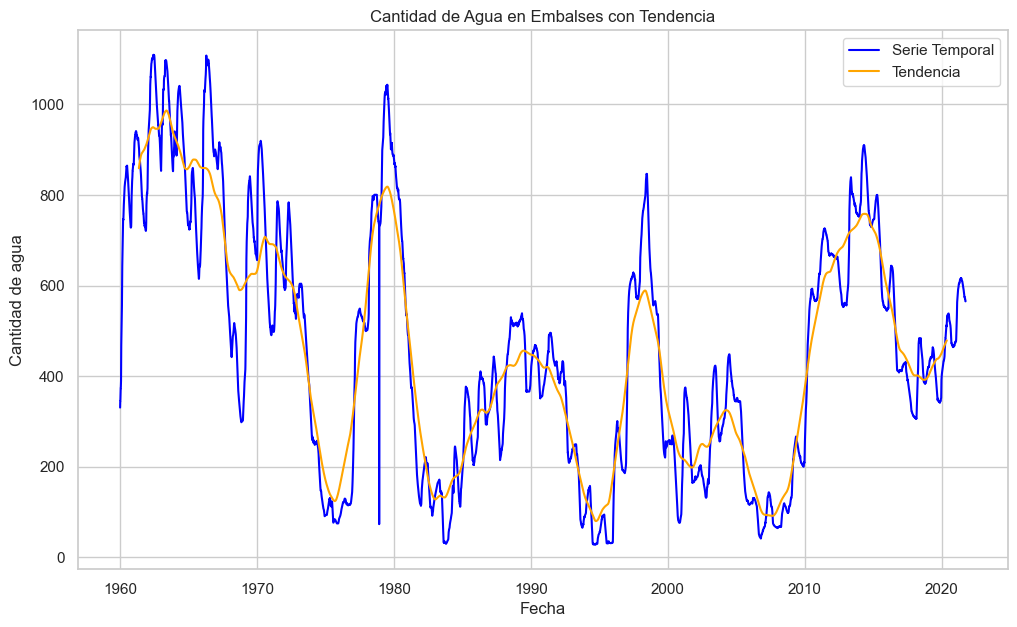

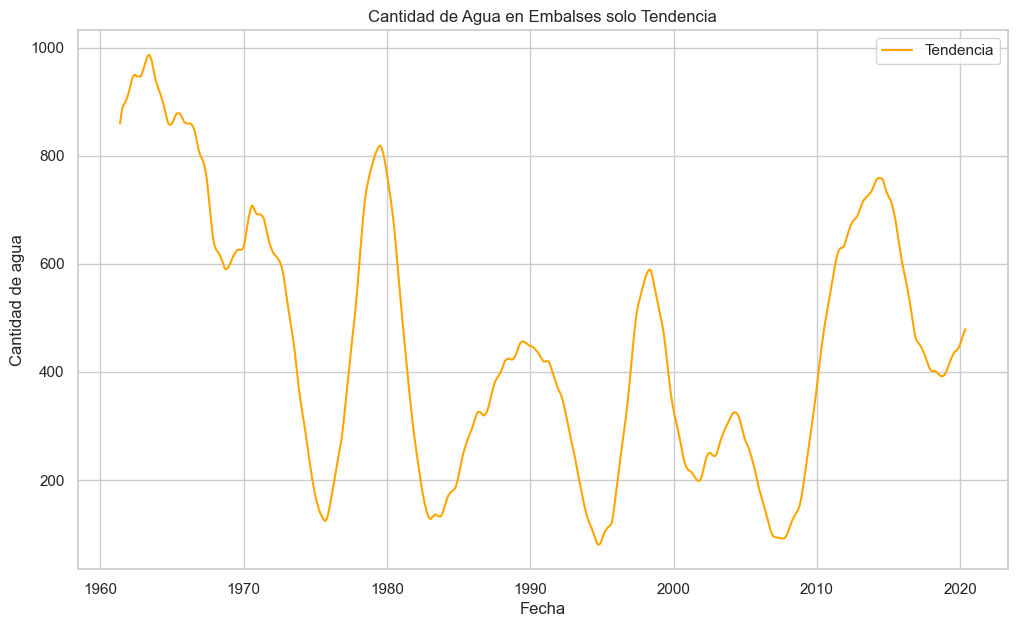

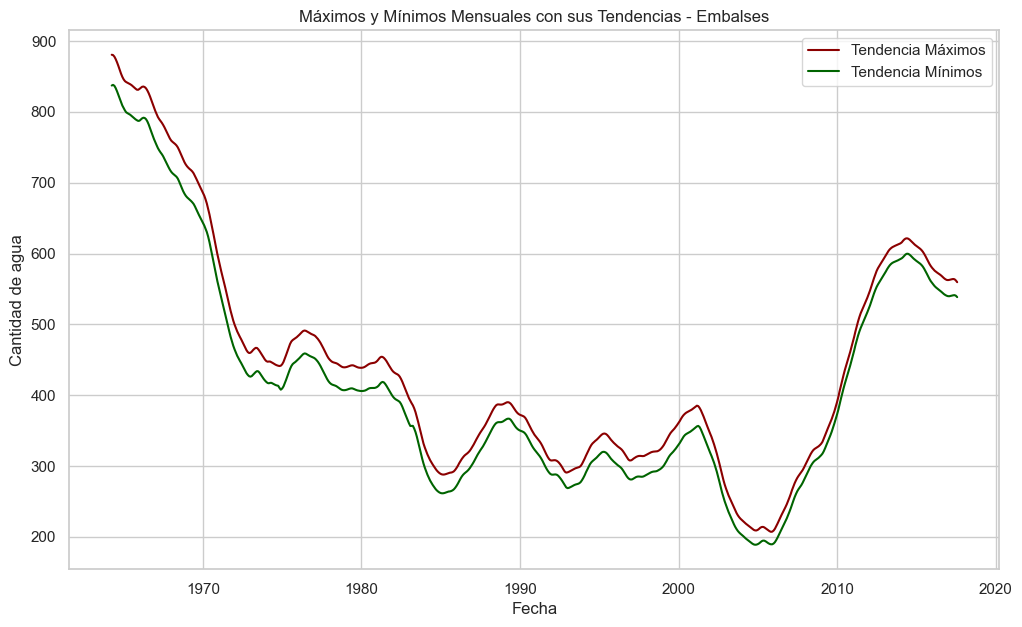

In [331]:
series_alarcon = df_merge_embalses[df_merge_embalses['id_station'] == 8001][['date', 'quantity_hm3_embalses']].dropna().set_index('date')

# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(series_alarcon['quantity_hm3_embalses'], model='additive', period=1000)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=series_alarcon.index, y=series_alarcon['quantity_hm3_embalses'], label='Serie Temporal', color='blue')
sns.lineplot(x=series_alarcon.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalse de Alarcón con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalse de Alarcón solo Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

# Encontrar máximos y mínimos de la serie temporal mensual
maximos = series_alarcon['quantity_hm3_embalses'].resample('M').max()
minimos = series_alarcon['quantity_hm3_embalses'].resample('M').min()

# Extraer tendencias usando descomposición de serie temporal
tendencia_maximos = sm.tsa.seasonal_decompose(maximos, model='additive', period=100).trend
tendencia_minimos = sm.tsa.seasonal_decompose(minimos, model='additive', period=100).trend

# Graficar máximos, mínimos y sus tendencias
plt.figure(figsize=(12, 7))

# Graficar máximos y su tendencia
sns.lineplot(x=tendencia_maximos.index, y=tendencia_maximos, label='Tendencia Máximos', color='darkred')

# Graficar mínimos y su tendencia
sns.lineplot(x=tendencia_minimos.index, y=tendencia_minimos, label='Tendencia Mínimos', color='darkgreen')


# Configuraciones del gráfico
plt.title('Máximos y Mínimos Mensuales con sus Tendencias - Embalse de Alarcón')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

## Embalse de CONTRERAS

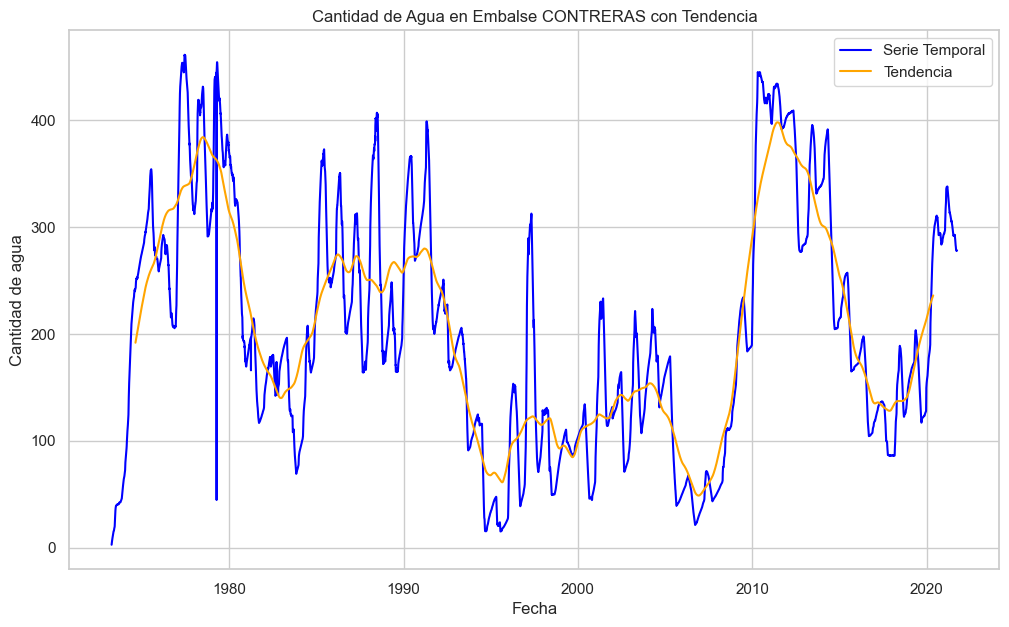

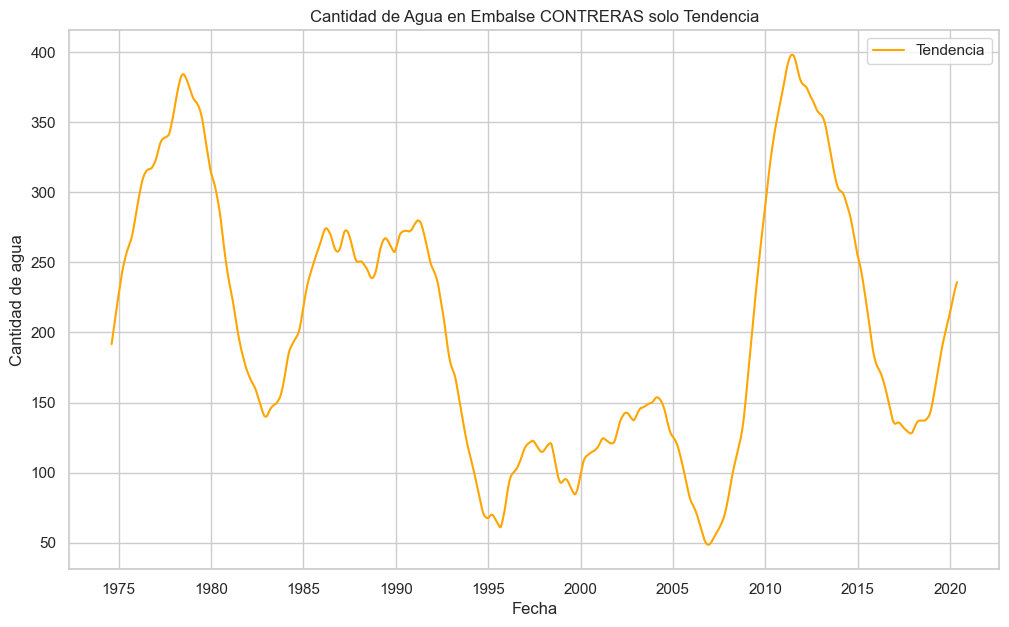

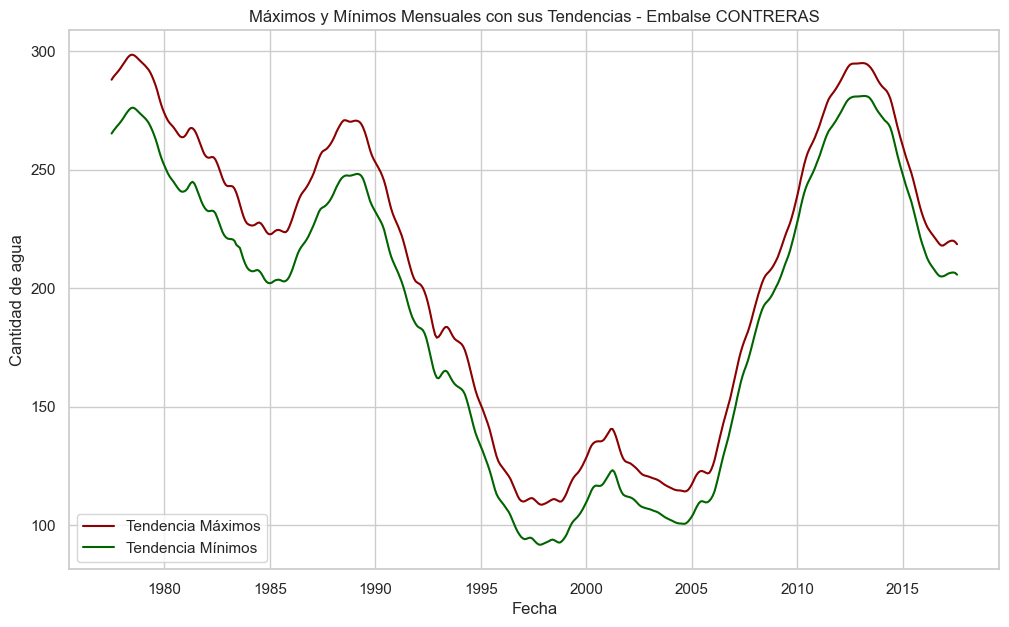

In [333]:
series = df_merge_embalses[df_merge_embalses['id_station'] == 8009][['date', 'quantity_hm3_embalses']].dropna().set_index('date')

# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(series['quantity_hm3_embalses'], model='additive', period=1000)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=series.index, y=series['quantity_hm3_embalses'], label='Serie Temporal', color='blue')
sns.lineplot(x=series.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalse CONTRERAS con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalse CONTRERAS solo Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

# Encontrar máximos y mínimos de la serie temporal mensual
maximos = series['quantity_hm3_embalses'].resample('M').max()
minimos = series['quantity_hm3_embalses'].resample('M').min()

# Extraer tendencias usando descomposición de serie temporal
tendencia_maximos = sm.tsa.seasonal_decompose(maximos, model='additive', period=100).trend
tendencia_minimos = sm.tsa.seasonal_decompose(minimos, model='additive', period=100).trend

# Graficar máximos, mínimos y sus tendencias
plt.figure(figsize=(12, 7))

# Graficar máximos y su tendencia
sns.lineplot(x=tendencia_maximos.index, y=tendencia_maximos, label='Tendencia Máximos', color='darkred')

# Graficar mínimos y su tendencia
sns.lineplot(x=tendencia_minimos.index, y=tendencia_minimos, label='Tendencia Mínimos', color='darkgreen')


# Configuraciones del gráfico
plt.title('Máximos y Mínimos Mensuales con sus Tendencias - Embalse CONTRERAS')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

## Embalse de Tous

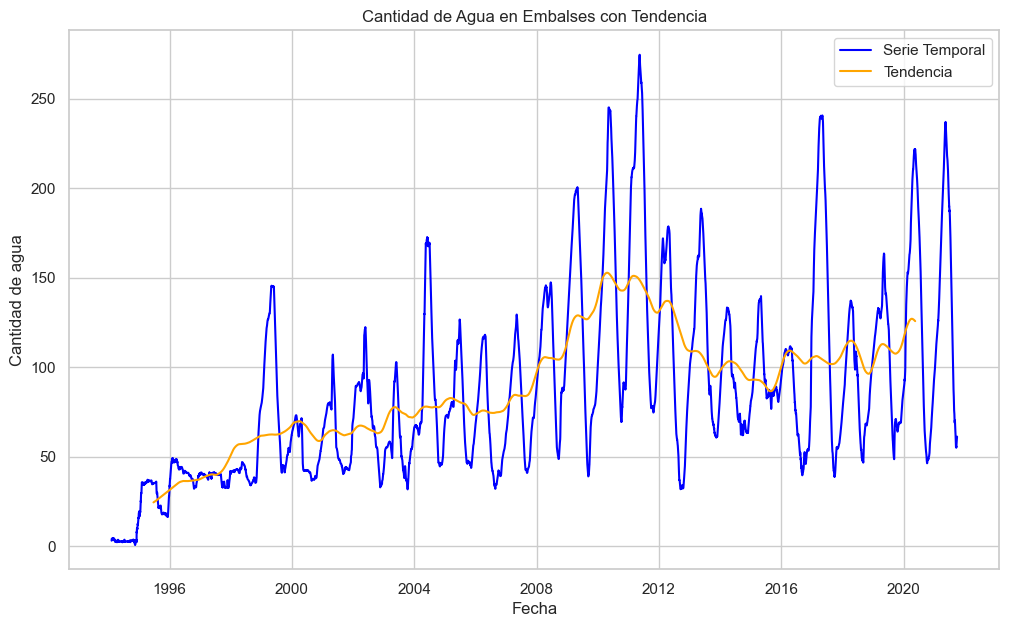

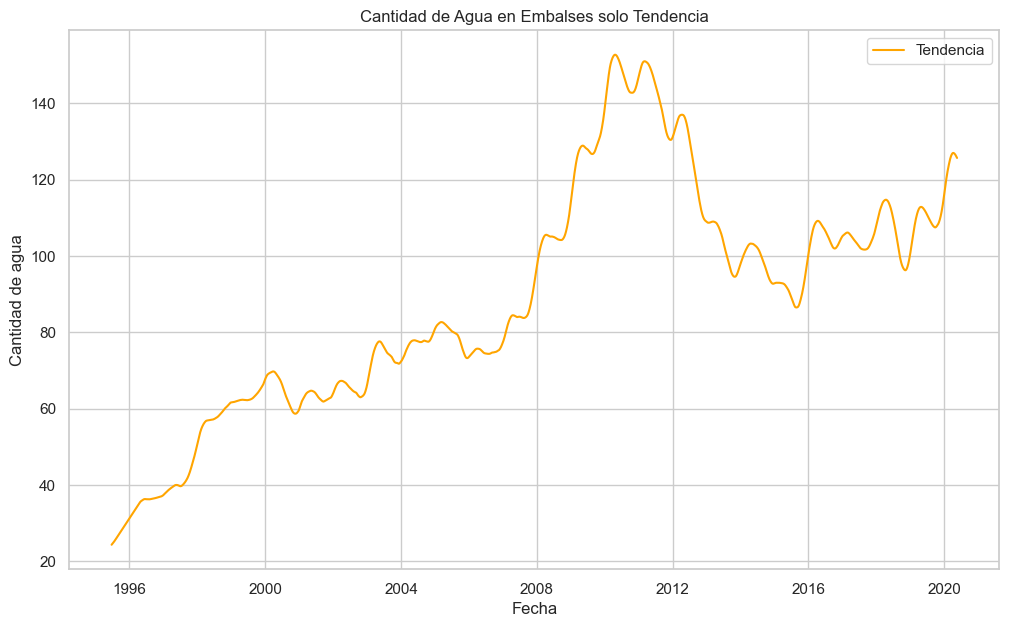

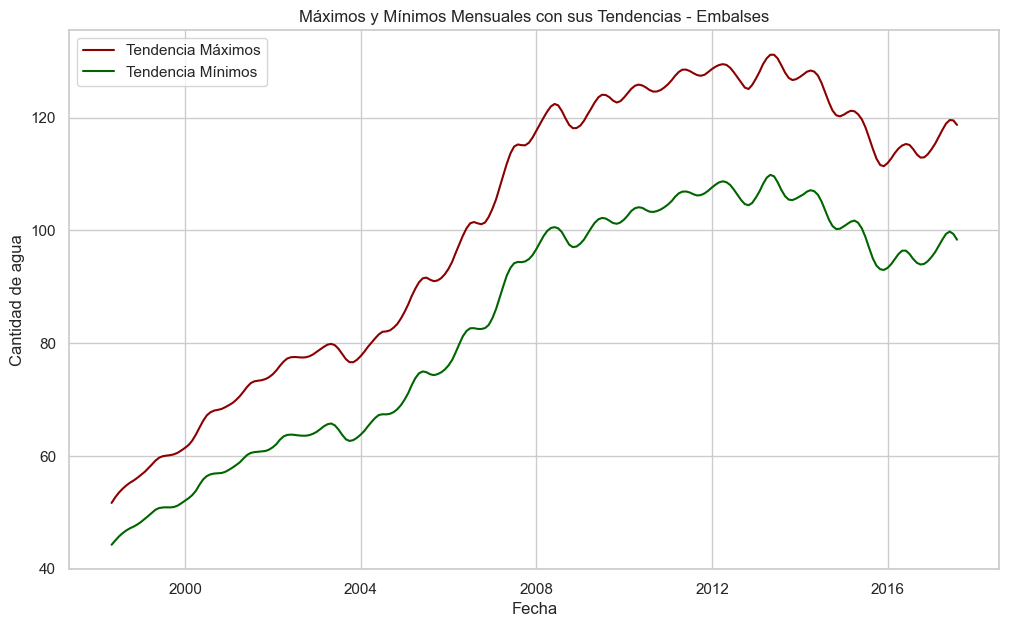

In [332]:
series_alarcon = df_merge_embalses[df_merge_embalses['id_station'] == 8030][['date', 'quantity_hm3_embalses']].dropna().set_index('date')

# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(series_alarcon['quantity_hm3_embalses'], model='additive', period=1000)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=series_alarcon.index, y=series_alarcon['quantity_hm3_embalses'], label='Serie Temporal', color='blue')
sns.lineplot(x=series_alarcon.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalse deTous con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalse deTous solo Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

# Encontrar máximos y mínimos de la serie temporal mensual
maximos = series_alarcon['quantity_hm3_embalses'].resample('M').max()
minimos = series_alarcon['quantity_hm3_embalses'].resample('M').min()

# Extraer tendencias usando descomposición de serie temporal
tendencia_maximos = sm.tsa.seasonal_decompose(maximos, model='additive', period=100).trend
tendencia_minimos = sm.tsa.seasonal_decompose(minimos, model='additive', period=100).trend

# Graficar máximos, mínimos y sus tendencias
plt.figure(figsize=(12, 7))

# Graficar máximos y su tendencia
sns.lineplot(x=tendencia_maximos.index, y=tendencia_maximos, label='Tendencia Máximos', color='darkred')

# Graficar mínimos y su tendencia
sns.lineplot(x=tendencia_minimos.index, y=tendencia_minimos, label='Tendencia Mínimos', color='darkgreen')


# Configuraciones del gráfico
plt.title('Máximos y Mínimos Mensuales con sus Tendencias - Embalse deTous')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

## Total embalses

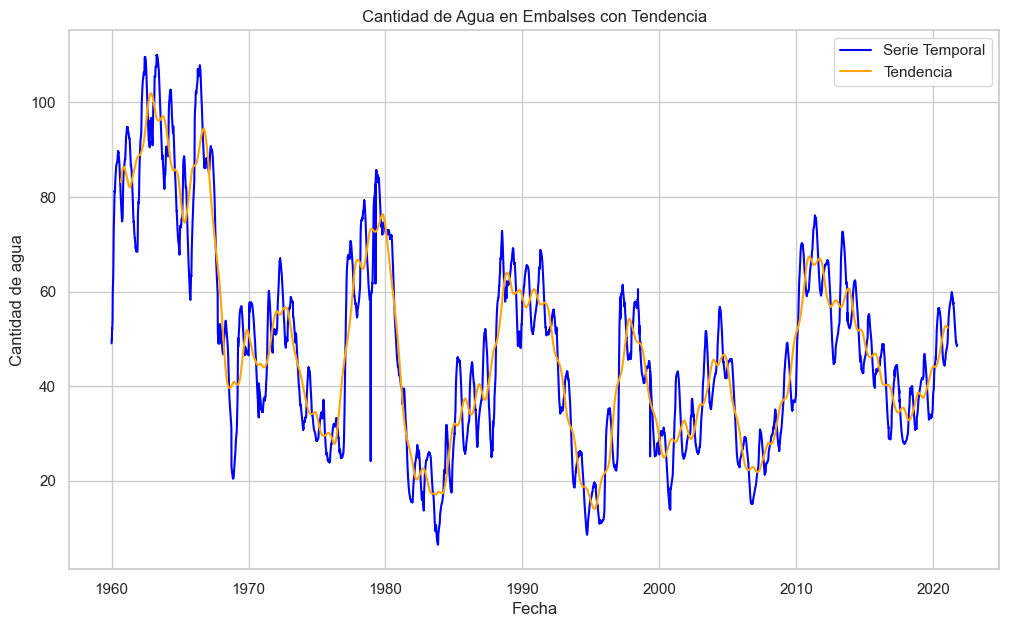

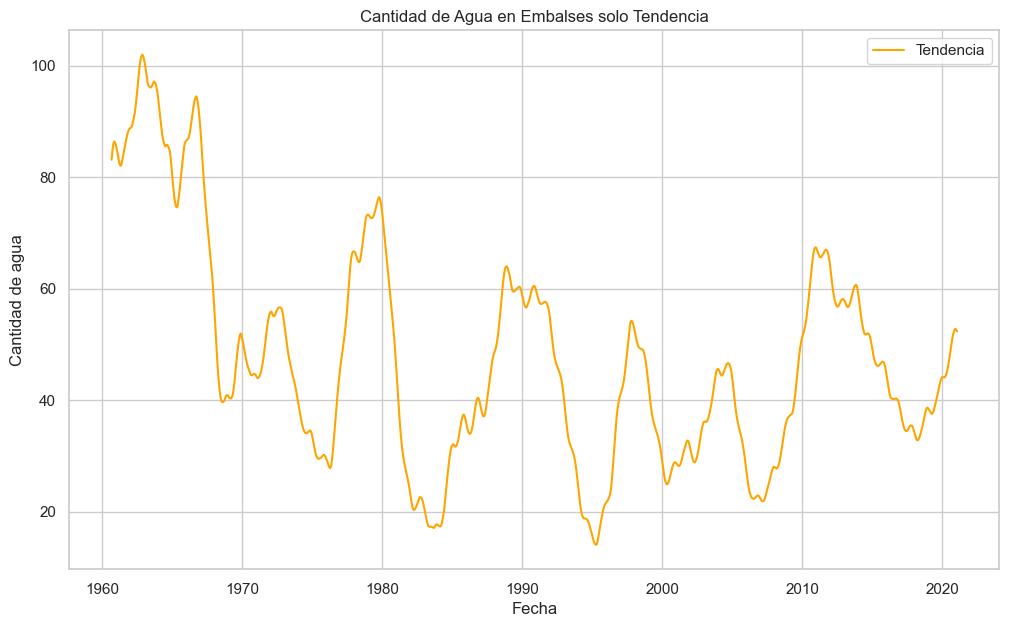

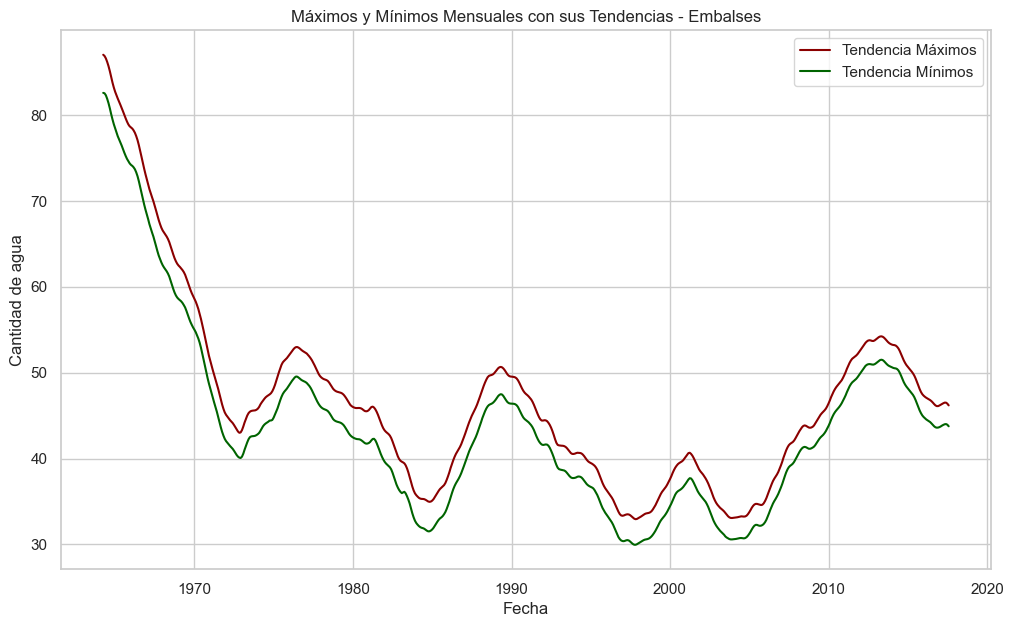

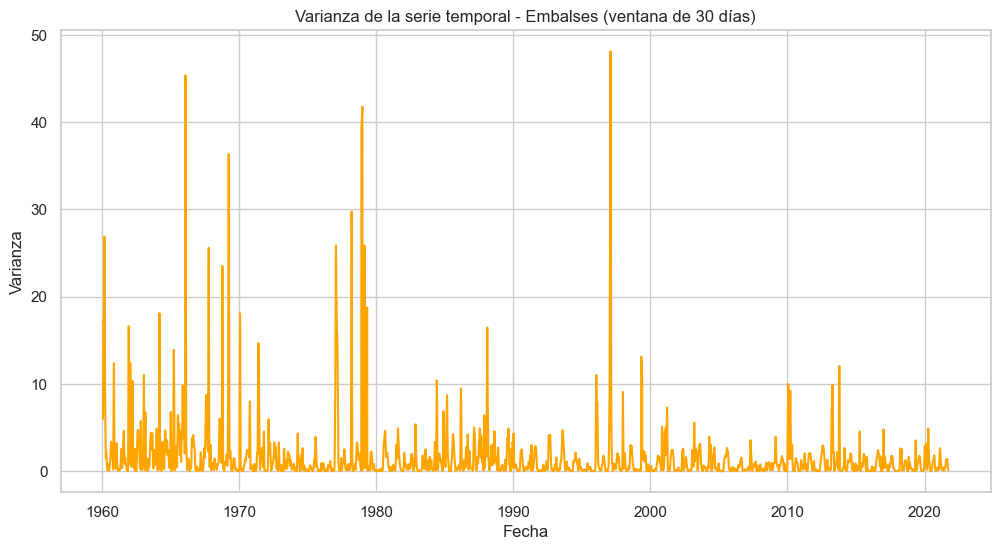

In [355]:
df_embalses = df_merge_embalses[['date', 'quantity_hm3_embalses']]
seriesEmbalses= df_embalses[['date','quantity_hm3_embalses']].groupby('date').mean()

# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(seriesEmbalses['quantity_hm3_embalses'], model='additive', period=500)
tendencia = decomposition.trend

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=seriesEmbalses.index, y=seriesEmbalses['quantity_hm3_embalses'], label='Serie Temporal', color='blue')
sns.lineplot(x=seriesEmbalses.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalses con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()


# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalses solo Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

# Encontrar máximos y mínimos de la serie temporal mensual
maximos = seriesEmbalses['quantity_hm3_embalses'].resample('M').max()
minimos = seriesEmbalses['quantity_hm3_embalses'].resample('M').min()

# Extraer tendencias usando descomposición de serie temporal
tendencia_maximos = sm.tsa.seasonal_decompose(maximos, model='additive', period=100).trend
tendencia_minimos = sm.tsa.seasonal_decompose(minimos, model='additive', period=100).trend

# Graficar máximos, mínimos y sus tendencias
plt.figure(figsize=(12, 7))

# Graficar máximos y su tendencia
sns.lineplot(x=tendencia_maximos.index, y=tendencia_maximos, label='Tendencia Máximos', color='darkred')

# Graficar mínimos y su tendencia
sns.lineplot(x=tendencia_minimos.index, y=tendencia_minimos, label='Tendencia Mínimos', color='darkgreen')


# Configuraciones del gráfico
plt.title('Máximos y Mínimos Mensuales con sus Tendencias - Embalses')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

# Calcular la varianza en ventanas de 30 días
varianza_30_dias = seriesEmbalses['quantity_hm3_embalses'].rolling(window=30).var()

# Graficar la varianza
plt.figure(figsize=(12, 6))
sns.lineplot(x=varianza_30_dias.index, y=varianza_30_dias, color='orange')
plt.title('Varianza de la serie temporal - Embalses (ventana de 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Varianza')
plt.show()

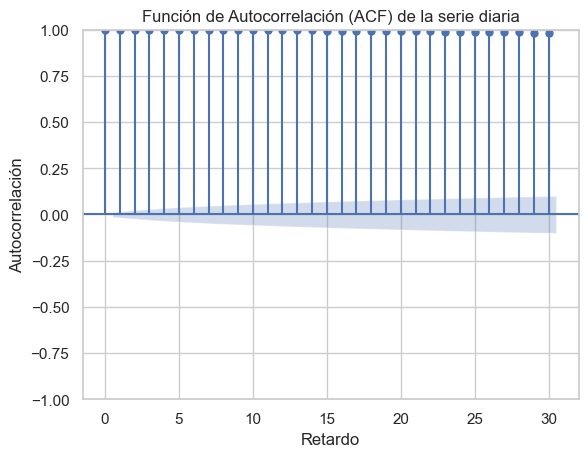

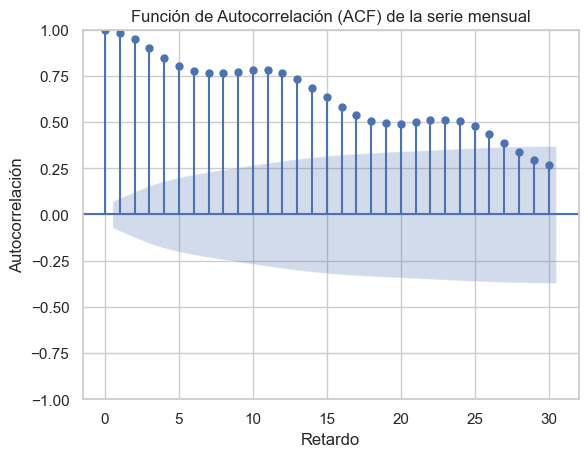

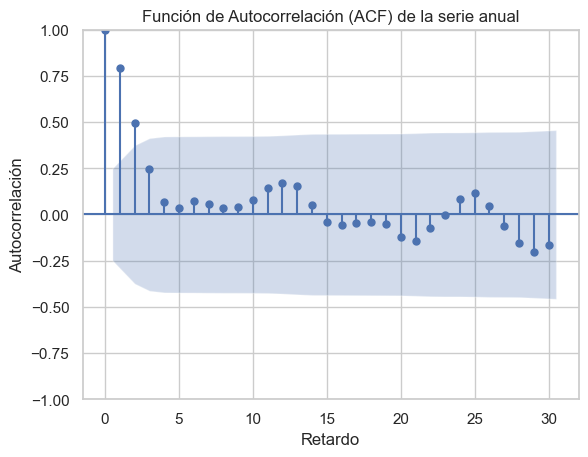

In [301]:
plot_acf(seriesEmbalses['quantity_hm3_embalses'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie diaria')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

monthly_series = seriesEmbalses.resample('M').mean()
monthly_series.reset_index(inplace=True)
plot_acf(monthly_series['quantity_hm3_embalses'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie mensual')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

year_series = seriesEmbalses.resample('Y').mean()
year_series.reset_index(inplace=True)
plot_acf(year_series['quantity_hm3_embalses'], lags=30)  # Ajusta lags según sea necesario
plt.title('Función de Autocorrelación (ACF) de la serie anual')
plt.xlabel('Retardo')
plt.ylabel('Autocorrelación')
plt.show()

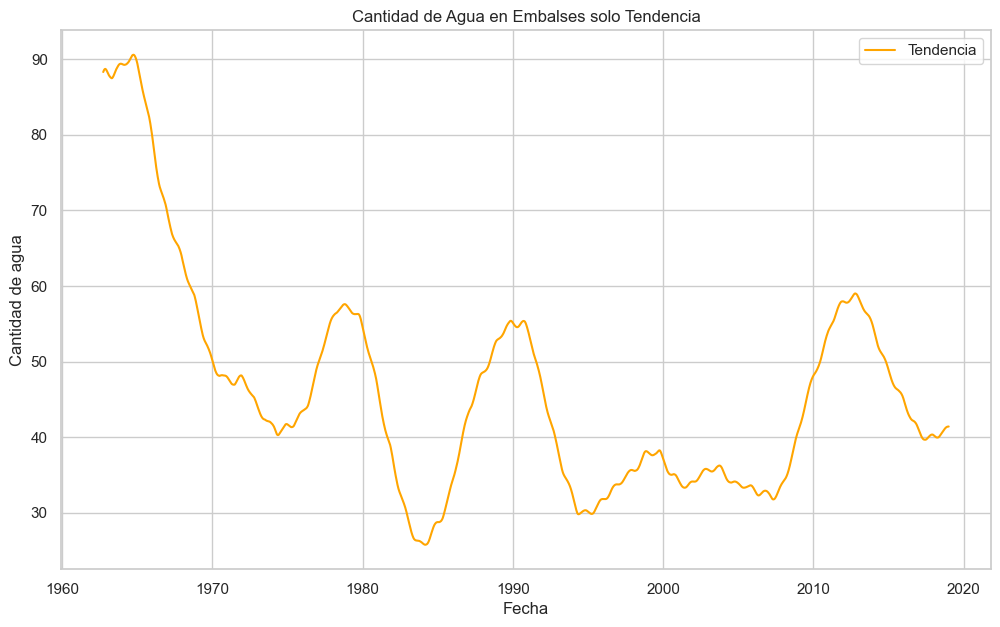

In [360]:
df_embalses = df_merge_embalses[['date', 'quantity_hm3_embalses']]
seriesEmbalses= df_embalses[['date','quantity_hm3_embalses']].groupby('date').mean()

# Descomponer la serie para extraer la tendencia
decomposition = seasonal_decompose(seriesEmbalses['quantity_hm3_embalses'], model='additive', period=2000)
tendencia = decomposition.trend

sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=tendencia.index, y=tendencia, label='Tendencia', color='orange')
plt.title('Cantidad de Agua en Embalses solo Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.legend()
plt.show()

## Entrada y salida de agua Embalses 

In [363]:
series_mes = pd.read_excel('BBDD/Cuenca hidrográfica Juca SI/F2797_Embalses_ROEA/F2797_D1_Serie mes.xlsx')
embalses_id = pd.read_excel('BBDD/Cuenca hidrográfica Juca SI/F2797_Embalses_ROEA/F2797_M0_Embalses_ROEA.xlsx')

In [368]:
alarcon = series_mes[series_mes['Cód. Embalse'] == 8001].dropna()

In [376]:
alarcon.columns

Index(['Cód. Embalse', 'Fecha', 'Entrada (hm³)', 'Salida (hm³)',
       'Volumen (hm³)'],
      dtype='object')

In [387]:
alarcon['Entrada_salida'] = alarcon['Entrada (hm³)'] - alarcon['Salida (hm³)']
alarcon['Entrada_salida_cum'] = alarcon['Entrada_salida'].cumsum()

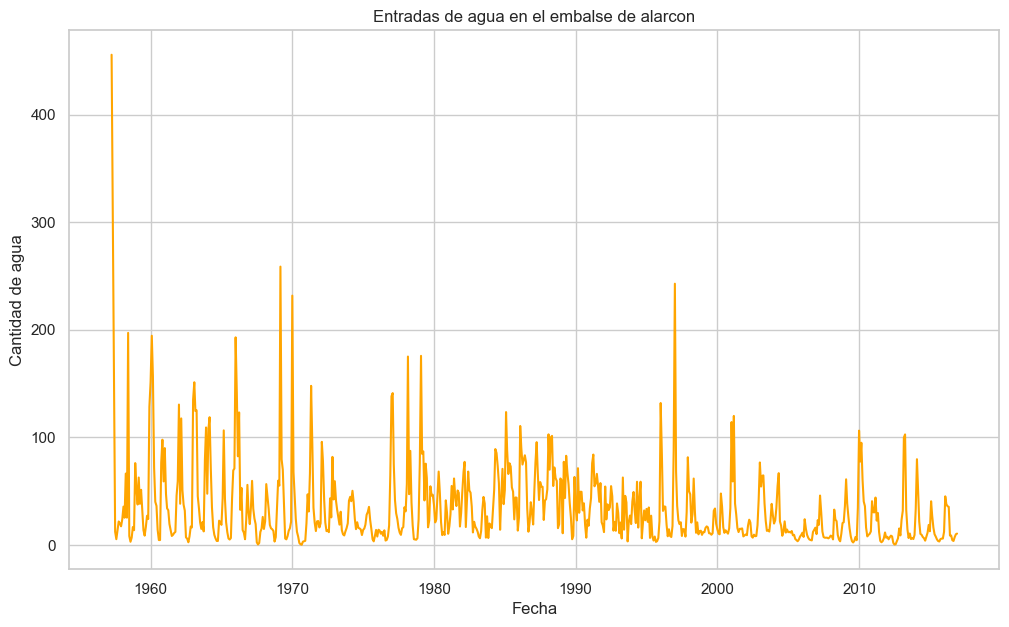

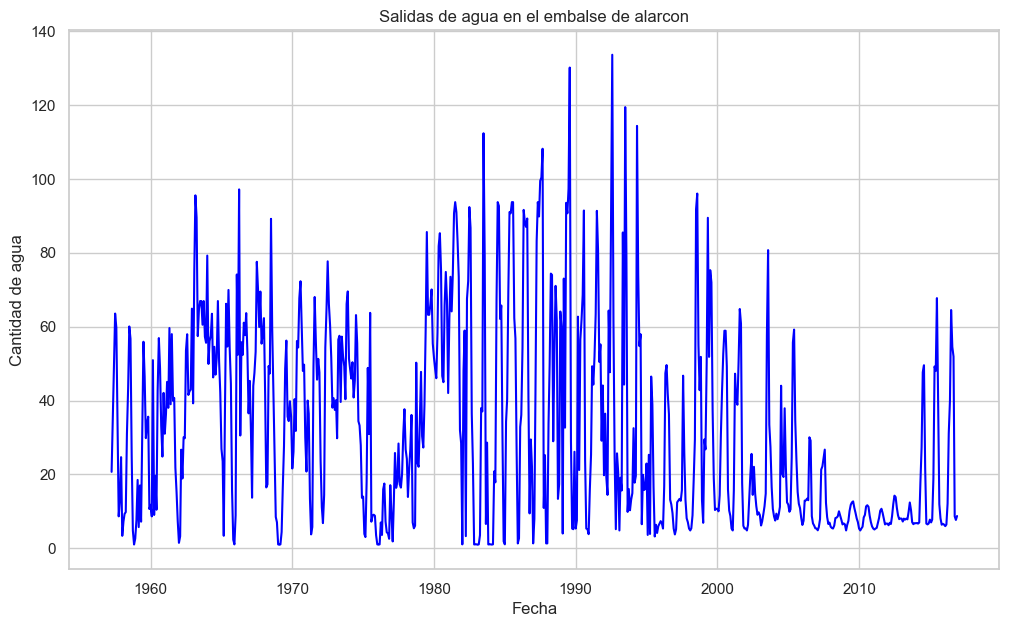

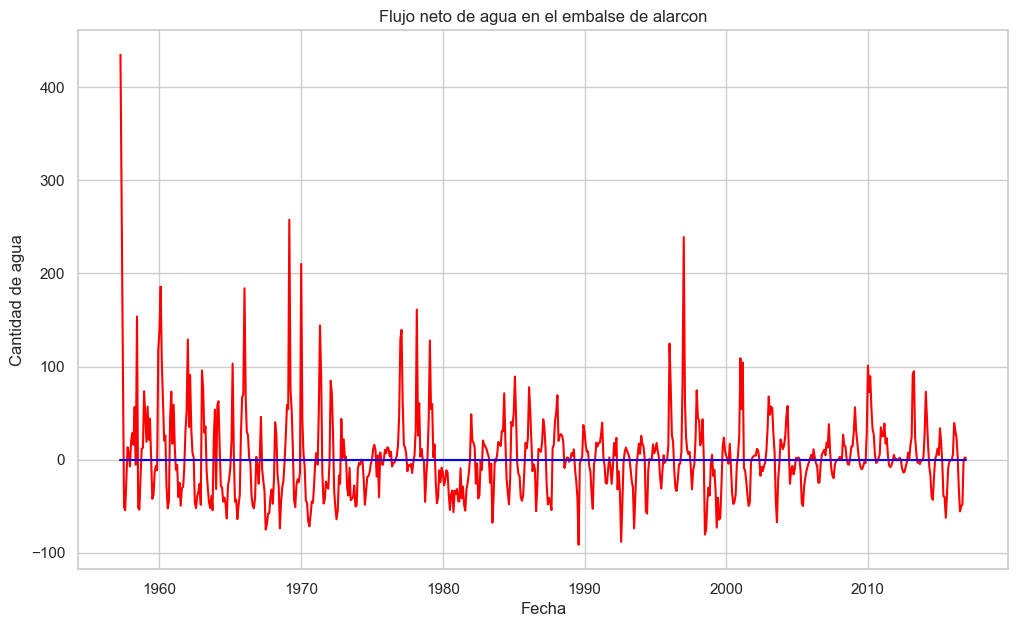

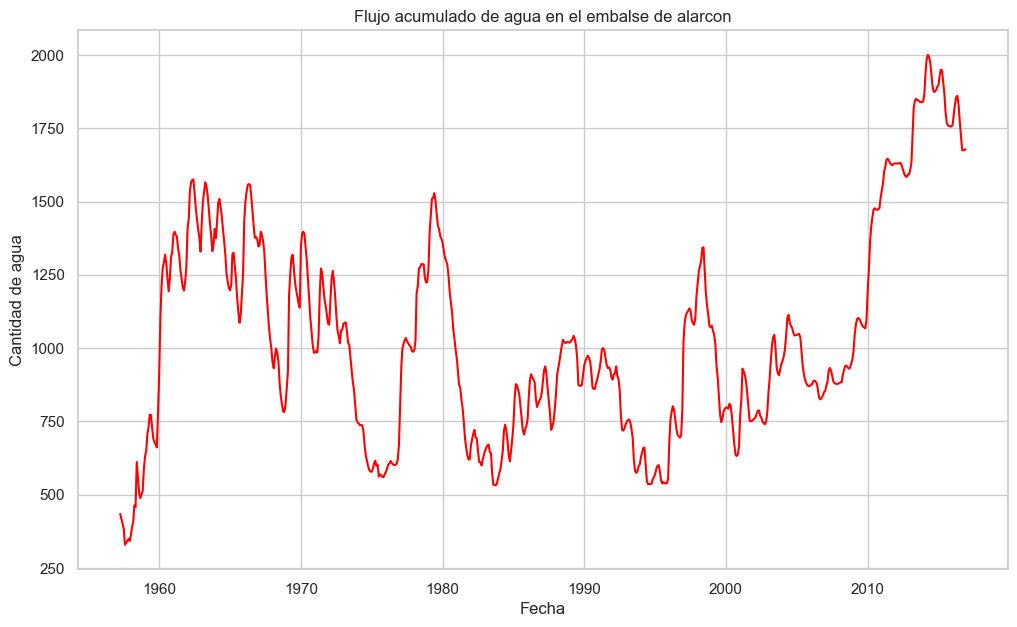

In [402]:
sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=alarcon['Fecha'], y=alarcon['Entrada (hm³)'], color='orange')
plt.title('Entradas de agua en el embalse de alarcon')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.show()

sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=alarcon['Fecha'], y=alarcon['Salida (hm³)'], color='Blue')
plt.title('Salidas de agua en el embalse de alarcon')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.show()

sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=alarcon['Fecha'], y=alarcon['Entrada_salida'], color='Red')
sns.lineplot(x=alarcon['Fecha'], y=0, color='Blue')
plt.title('Flujo neto de agua en el embalse de alarcon')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.show()

sns.set(style="whitegrid")

# Graficar la serie temporal y la tendencia en el mismo gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(x=alarcon['Fecha'], y=alarcon['Entrada_salida_cum'], color='Red')
plt.title('Flujo acumulado de agua en el embalse de alarcon')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de agua')
plt.show()

### Influencia de estaciones de aforo de más altura con estaciones de aforo de menor altura

Todas estas estaciones de aforo estan vinculadas con el sistema de explotación del jucar pero no todos pasan por el rio jucar. Como tengo entendido , por las siguientes sí que pasa el jucar

* Alcalá del Júcar
* Cuenca
* Cullera
* Alcira

In [227]:
municipios_jucar = ['Alcalá del Júcar', 'Cuenca', 'Cullera', 'Alzira']

In [228]:
df_rios_canales_id_jucar = df_rios_canales_id[df_rios_canales_id['Sistema de Explotación'] == 'Júcar']

In [238]:
#Filtramos estaciones de aforo del jucar
df_rios_canales_id_jucar = df_rios_canales_id[df_rios_canales_id['Sistema de Explotación'] == 'Júcar']
df_rios_canales_id_jucar = df_rios_canales_id_jucar[df_rios_canales_id_jucar['Municipio'].isin(municipios_jucar)]
df_rios_canales_id_jucar.loc[:, 'Altitud (m)'] = df_rios_canales_id_jucar['Altitud (m)'].str.replace(',', '.').astype('float')
#Sacamos el id de la estación y la altitud correspondiente
estaciones_alturas = df_rios_canales_id_jucar[['Municipio','Estación de Aforo','id_station','Altitud (m)']].sort_values(['Altitud (m)'],ascending = False).reset_index(drop = True).fillna(0).iloc[:-1]

Estaciones de aforo del río Jucar ordenados por alturas

In [239]:
estaciones_alturas

,Municipio,Estación de Aforo,id_station,Altitud (m)
0,Cuenca,CUENCA,8032,916.00
1,Alcalá del Júcar,ALCALA DEL JUCAR,8144,274.00
2,Alzira,ALBORCHI,8064,35.00
3,Alzira,ALCIRA,8045,20.00
4,Cullera,CULLERA,8049,7.00
5,Cullera,AZUD DE LA MARQUESA,8153,4.34


In [401]:
seriesJucar.groupby('id_station').mean()[['quantity_hm3_riosCanales','Altitud (m)']].sort_values('quantity_hm3_riosCanales',ascending = False)

,quantity_hm3_riosCanales,Altitud (m)
id_station,,
8045,2.657801,20.00
8049,1.950571,7.00
8144,0.816768,274.00
8032,0.749914,916.00
8153,0.720595,4.34


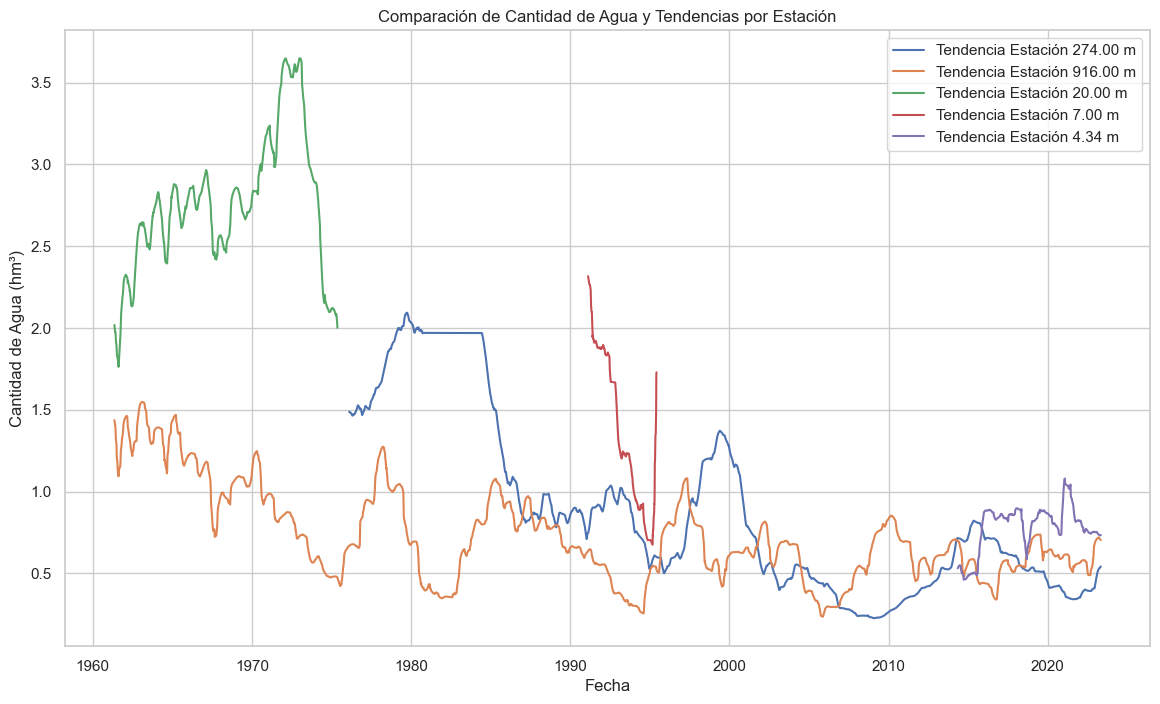

In [271]:
seriesJucar = pd.merge(df_merge_riosCanales,estaciones_alturas[['id_station','Altitud (m)']], on = 'id_station', how = 'inner')[['id_station', 'date', 'quantity_hm3_riosCanales','Altitud (m)']]
estaciones_alturas_list = estaciones_alturas['id_station'].to_list()

plt.figure(figsize=(14, 8))

for i in seriesJucar['id_station'].unique():
    # Filtrar los datos de la estación actual
    SerieEstacionJucar = seriesJucar[seriesJucar['id_station'] == i].sort_values('date').set_index('date').fillna(0)
    
    # Calcular la media de altitud
    altitud = SerieEstacionJucar['Altitud (m)'].mean()
    
    # Obtener la cantidad de agua
    cantidadAgua = SerieEstacionJucar['quantity_hm3_riosCanales']
    

    # Descomponer la serie temporal para obtener la tendencia
    result = seasonal_decompose(cantidadAgua, model='additive', period=1000)  
    trend = result.trend

    # Graficar la tendencia
    plt.plot(trend.index, trend, label=f'Tendencia Estación {altitud:.2f} m')  # Línea discontinua para la tendencia

plt.title('Comparación de Cantidad de Agua y Tendencias por Estación')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Agua (hm³)')
plt.legend()
plt.show()